# MURCHIE85 TWITTER STREAM PROCESSING 



![image](https://images.complex.com/complex/image/upload/c_limit,w_680/fl_lossy,pg_1,q_auto/huja00mnx1lzwzqnoz2e.jpg)




This repo is for pulling metrics on a given keyword (best use keywords that are hashtagged) and performs a series of reporting and analysis.

## OVERVIEW

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)


## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://murchie85.github.io/images/index/fab.jpg)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [7]:
import datetime


f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 

If you want to change the parameters, edit the following line:  

```
stream.filter(track=["SexStrike"],languages=["en"])
```

*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [8]:
import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []

class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=10000 # max number of tweets
        self.tweet_number+=1   
        status_array.append(status._json)
        #print(status.text)
        if self.tweet_number>=self.max_tweets:
            sys.exit('Limit of '+str(self.max_tweets)+' tweets reached.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

print('Pulling down data.....')
stream.filter(track=["SexStrike"],languages=["en"])

This veto would be a good thing for all of us to consider.
😍 #TDS:  Trump has now managed to start an Abstinence Movement among the "Libs"...AMAZING! ❤
RT @AbbyJohnson: On this Mother’s Day, I am in FULL support of pro-abortion women going on a sex strike. Sounds great for our movement and…
RT @AbbyJohnson: On this Mother’s Day, I am in FULL support of pro-abortion women going on a sex strike. Sounds great for our movement and…
@handillonmd @Zacksaxe @emrazz @Alyssa_Milano #SexStrike is an innovative idea. Women shud hav right of their own ability to gratify men.
RT @Alyssa_Milano: Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregna…
RT @PatrickArnold77: Funniest thing you will watch all day!! ‘I’m doing it for Alyssa Milano!!!’ Woman PERFECTLY mocks  https://t.co/i4uRnf…
RT @AbbyJohnson: On this Mother’s Day, I am in FULL support of pro-abortion women going on a sex strike. Sounds great for our movement and…
We are c

RT @usminority: Why do I get the feeling tens of millions of men are about to #Sexit the Democratic Party? https://t.co/XrKqv1iQMn
@dt_TruckinOnQDF The disappointment must be running rampant across the nation right now. I’ll join you in… https://t.co/YVt5HALAVf
RT @MarkYoungTruth: Ok, this is just hysterical. A sex strike? So are we to believe that up until now women having sex was a job? That soun…
RT @AbbyJohnson: On this Mother’s Day, I am in FULL support of pro-abortion women going on a sex strike. Sounds great for our movement and…
RT @mckellogs: is it like, a cry for help https://t.co/ho5TC4sEqT
RT @Maggie_McNeill: Really?  I'm a sex worker. I get PAID to have sex and I have a whole CAREER in fighting for women's right to control ou…
Can someone tell me the setting for twitter that leads to a celebrity-activist free zone? @KimKardashian championin… https://t.co/4cn7rsaYfX
RT @JustandSinner: Does she think those of us who are pro-life would be upset about this? This is exactly wha

RT @mostlybree: I'm going to pretend SexStrike isn't happening for 8,000 reasons large and small but particularly because reinforcing the u…
RT @KatTheHammer1: Yeah .@Alyssa_Milano
this will really get them😏

Yeah I'll take pass on this little gem. 

#SexStrike 😂 https://t.co/oQy…
RT @Blackamazon: This isn’t Lysistrata you dizzy egomaniac. All women aren’t cis or heterosexual . There are women in Georgia you could be…
RT @BenBurgis: I have an even better idea than a #sexstrike. What if everyone went on strike but.....hear me out.....from work instead of s…
RT @V_actually: So the prism through which you view sex is about "being on strike" ?

You see sex as a tool to gain power and not as an exp…
RT @usminority: Why do I get the feeling tens of millions of men are about to #Sexit the Democratic Party? https://t.co/XrKqv1iQMn
RT @LynnComella: A "sex strike" perpetuates the myth that sex is the domain of men &amp; that by striking you are denying men something they ar…
RT @heyyguido: My pr

RT @loyalmoses: @Alyssa_Milano She’s admitting that abortion as an option increases risky behavior.

She’s also admitting that abstinence w…
@Alyssa_Milano My wishes! Atleast the women shud hav right to abort at any juncture of pregnancy. #SexStrike
RT @VABVOX: White heterosexual women are promoting a #SexStrike to get equal rights and seem not to have even noticed that not all women ar…
RT @iamivybleu: #SexStrike
Can we still suck dicks... or nah?

💋 https://t.co/osFgrFpRJR
Watch me fuck REAL fans!

💋 https://t.co/3EHag9Y58…
RT @Femmefeministe: 1. Erasing LGBTQIA folks from the discussion of abortion and centering solutions (if you can call this a solution) arou…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @ZeroResurrected: You’re literally telling women what to do with their bodies... https://t.co/vkf6wvBK1K
RT @CarmineSabia: It appears liberal women are going on a #SexStrike...

Yeah,

RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
Most conservative men do not cook. A few do. Wish they were tattooed with an insignia like a $ sign. Then women who… https://t.co/KT80MJfd3N
Girl Aristophanes said been there done that when he wrote lysistrata in 411 BC
RT @AbbyJohnson: On this Mother’s Day, I am in FULL support of pro-abortion women going on a sex strike. Sounds great for our movement and…
RT @Alyssa_Milano: Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregna…
RT @shannonrwatts: Rape has nothing to do with sex - it’s about hatred and power, the same causes of women being stripped of their rights.…
RT @RealCandaceO: From an evolutionary perspective, the radical feminist #sexstrike has the potential to save America. 

Yes, ladies—leave…
Huh. No abortions AND no sex? Why must we punish ourselves. This is peak White

RT @lisastark351: If you are a man who believes a women should be able to make decisions about her own body you win blow jobs and tons of s…
@quendi #sexstrike reaping immediate results?
RT @stillnaima: Lmao.
No.

This actually SUPPORTS the idea that we’re just walking vaginas, and/or only here to serve men’s sexual needs. A…
RT @Femmefeministe: 1. Erasing LGBTQIA folks from the discussion of abortion and centering solutions (if you can call this a solution) arou…
RT @BeeHughes_: Would a general strike not be much more effective? Reproductive autonomy goes beyond sex, it impacts every part of life, no…
RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
RT @GirlieTrump: Best birth control idea comes from the left. Go figure https://t.co/PdwX66YtBB
RT @Alyssa_Milano: We can LOVE sex and fight for our bodily autonomy. There are lots of alternatives to cis men. 

Protect your vaginas, la…
RT @V_actual

RT @PoliticusSarah: Hey everyone upset about Alyssa Milano's #sexstrike: Thanks for helping this trend, that was the point, b/c women's liv…
RT @EbonykKing: Here’s a WILD thought.

And bear with me, it’s WILD!

How about, instead of a #sexstrike,

You only have sex with people yo…
RT @JackPosobiec: And just like thay the Left is practicing abstinence - this is what we Catholics have been teaching all along! 

Carry on…
RT @CarmineSabia: It appears liberal women are going on a #SexStrike...

Yeah, we good. https://t.co/o4n89b4pL7
RT @Alyssa_Milano: Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregna…
RT @RealCandaceO: From an evolutionary perspective, the radical feminist #sexstrike has the potential to save America. 

Yes, ladies—leave…
RT @girlsreallyrule: If women have total control over our bodies, we control reproduction. If you control reproduction, you control the wor…
RT @Alyssa_Milano: Our reproductive rights 

RT @JackPosobiec: And just like thay the Left is practicing abstinence - this is what we Catholics have been teaching all along! 

Carry on…
RT @dallascowboywit: @Alyssa_Milano @Ms_Deathwish Maybe the way you do it...for you, a #SexStrike is a public service in protest clothing
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @ccpecknold: What the #MeToo Movement and #SexStrike Abstinence tells us is that the sexual revolution has come to it’s sad, exhausted,…
RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
RT @GrahamAllen_1: Ladies,

If you need a “typical” Hollywood elitist like @Alyssa_Milano to tell you to stop having sex so you don’t have…
RT @PoliticalOrgy: Will the #SexStrike goofs be wearing armbands in public so that men can more easily distinguish crazed activists from no…
RT @Imamofpeace: F

RT @andizeisler: I know this is well-meaning but the WHOLE. ENTIRE. POINT. of these horrifying laws is to punish women for daring to have a…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @eveibraham1: My Male friends are very thankful for the Liberal women kindness . https://t.co/bzp321JDQ8
RT @inthelineofmel: Or you could just get married, realize that pregnancy is not a disease or sickness, and stop using sex as a weapon and…
RT @realhublife: I am a HYOOOOGE fan of Liberal Women going on a #SexStrike.

It's peaceful. Highly effective. Hysterical.

I'm hoping they…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
Yeah it’s only is liberal women who like to fuck a lot. And we use abortion as birth control too.
RT @rreactor: @4RANDALL1 How effective is a #SexStrike by people who haven't had any in a 

RT @RealCandaceO: From an evolutionary perspective, the radical feminist #sexstrike has the potential to save America. 

Yes, ladies—leave…
RT @LilaGraceRose: Quick Primer on Actual “Reproductive Rights”:

• We have the right to decide when &amp; with whom to have sex
• We have the…
RT @BernForBernie20: Milano is using same talking point as conservative anti-choice groups: Abstinence is the "power of choice before pregn…
RT @Alyssa_Milano: Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregna…
RT @ErynnBrook: Refusal to make more white babies. Since that’s what this is really about.

Or labor strikes. Or everybody taking their kid…
RT @beccasaltz: I need to clarify that this @mcsweeneys piece was satire, not an actual suggestion on how to fight for reproductive rights.…
RT @maria_delrusso: Hi the idea of a #sexstrike just perpetuates the idea that sex is something women give and men take, creating a power i…
RT @KatTheH

RT @FuctupMike: I'm deeply disappointed. https://t.co/XqIa5WgYEq
Let's see how long these hoes can last
Honestly, does anyone think a 
#SexStrike is going to change #prolife morals and minds? @Alyssa_Milano This is abou… https://t.co/H7TjyUhJTe
RT @KittenHoliday: Feminists hate sex. 
#Sexstrike

I told you this in 2013 when they attacked me for my erotic stories filled with vanilla…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @Tombx7M: Not a Mother’s Day special
 #SexStrike #Qanon #MAGA #KAG #Trump
#Cnnsotu #Mediabuzz #FoxAndFriends
#MothersDayWeekend https://…
RT @_AshleyBratcher: Thanks for supporting abstinence @Alyssa_Milano, the number one way to prevent unintended pregnancy. 👏 #sexstrike http…
RT @usminority: This is the greatest tweet that has ever been put forth to humanity. 

My eyes will never again gaze upon anything on twitt…
I almost feel sorry for @Alyssa_Milano it must be 

People don't know women need love too?
RT @CarmineSabia: It appears liberal women are going on a #SexStrike...

Yeah, we good. https://t.co/o4n89b4pL7
RT @hrenee80: I will still be having sex, and I may even make him a sandwich after

....and that’s why I am happier than you.

#SexStrike
RT @Cindyb233: Finally!! Abstinence will prevent pregnancy which prevents abortions! Is the left becoming responsible for their actions? ht…
@NBCNews The #SexStrike proves that sex is only a commodity for women. They obviously don’t value it that much if t… https://t.co/IepOWxK3o7
RT @mostlybree: I'm going to pretend SexStrike isn't happening for 8,000 reasons large and small but particularly because reinforcing the u…
RT @GymCoachMac: Can't cuz they're on #SexStrike https://t.co/hD396oSyZg
RT @JackTragic2016: #Willie is happy as I'm sure dreaded #boinking the #hmHildabeast. He was much relieved to go elsewhere for #appendage p…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by stra

RT @AbbyJohnson: On this Mother’s Day, I am in FULL support of pro-abortion women going on a sex strike. Sounds great for our movement and…
RT @whitewinery: On board with team #sexstrike now. https://t.co/8OCjvnOMFo
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @decafmari_: how does me refusing to have sex with my college student boyfriend secure reproductive rights for women?

&amp; we shouldn’t ha…
RT @michaelbeatty3: Apparently...
the #SexStrike has been around for awhile🤣 https://t.co/Yta1lOkaM8
RT @usminority: Why do I get the feeling tens of millions of men are about to #Sexit the Democratic Party? https://t.co/XrKqv1iQMn
RT @realhublife: The left is gonna crumble on this one...

#SexStrike https://t.co/6LcsVyhJF8
RT @FaithNaff: A #SexStrike is 

RT @HoodSocialism: This is a bad take. Women are murdered for simply saying no &amp; for denying men’s sexual advances all of the time. Saying…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @mostlybree: I'm going to pretend SexStrike isn't happening for 8,000 reasons large and small but particularly because reinforcing the u…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @GrahamAllen_1: So @Alyssa_Milano wants women to withhold sex from men so they will be ok with them murdering babies?!🤔

It’s a bold str…
RT @michellemalkin: What if Alyssa Milano called for a #SexStrike and no one came? 

Oh, wait. I guess that's her goal.

🤢 https://t.co/Axt…
RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
@BernForBe

The jokes for the #sexstrike just keep getting better. https://t.co/GKbsuCtdEh
RT @heyyguido: My problem with this #SexStrike
It feeds the narrative that women only have sex to satisfy men’s sexual needs. It ignores wo…
RT @LVNancy: The moment you feel it move or kick -you know that is a baby -not a clump of cells.
#AbortionIsMurder
Society is normalizing m…
RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
RT @SouthernKeeks: Groundbreaking thought: men AND women are equally responsible when it comes to sex/pregnancy. We all know how things wor…
RT @realhublife: The left is gonna crumble on this one...

#SexStrike https://t.co/6LcsVyhJF8
RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
RT @RealG2daZ: Libs closing their legs to prevent the murder of infants seems like a brilliant idea. Thanks Alyssa! https:

RT @ErisofEliza: I feel like the #SexStrike is a subtle confession by straight white liberal women that they are having sex with the absolu…
RT @GirlieTrump: Best birth control idea comes from the left. Go figure https://t.co/PdwX66YtBB
RT @benshapiro: In which the Left discovers traditional sexual morality https://t.co/teNHY3T34d
RT @bigredwavenow: .@Alyssa_Milano...I understand why you feel this way, Growing Up In HollyWeird...No More Abortions is a Great Idea Lets…
RT @MikeSAdams: Oh snap! https://t.co/CjDfcurz3x
RT @JoeTalkShow: just so I understand, @Alyssa_Milano (who was great in Commando) is calling for women who are FOR killing unborn babies to…
RT @Joy_Villa: A #sexstrike. Umm....that’s called abstinence and although I don’t recommend it as I am a married woman who loves sex, for a…
RT @FuctupMike: I'm deeply disappointed. https://t.co/XqIa5WgYEq
RT @shannonrwatts: Rape has nothing to do with sex - it’s about hatred and power, the same causes of women being stripped of their 

SystemExit: Limit of 1000 tweets reached.

/Users/adammcmurchie/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# PRINT AND SAVE DATA

This section allows me to pull the recently mined data into a file in raw format incase i need it later.

In [9]:
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()

data/streamout-2019-05-12 18:50:30.850772.txt


# STREAM METADATA

In [10]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
print('An example element looks like: ')

Number of records
1000

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])

An example element looks like: 


# REPORT GENERATION

In [200]:
# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
for x in range(0, len(status_array)):
    print('************************************************************')
    print(status_array[x]['text'])
    print('------------------------------')
    print(status_array[x]['created_at'])
    print('------------------------------')
    print(status_array[x]['user']['name'])
    print('------------------------------')
    print(status_array[x]['user']['location'])
    print('------------------------------')
    print(status_array[x]['user']['description'])
    print('--------------REPLY COUNT----------------')
    print(status_array[x]['reply_count'])
    print('--------------RETWEET COUNT----------------')
    print(status_array[x]['retweet_count'])
    print('--------------RETWEETED?----------------')
    print(status_array[x]['retweeted'])
    print('--------------RETWEET COUNT----------------')
    print(status_array[x]['retweet_count'])
    print('--------------FAVOURITED----------------')
    print(status_array[x]['favorited'])
    print('--------------FAVOURITE COUNT----------------')
    print(status_array[x]['favorite_count'])
    print('')
    print('')


************************************************************
This veto would be a good thing for all of us to consider.
------------------------------
Sun May 12 17:33:09 +0000 2019
------------------------------
PolicySpace
------------------------------
US
------------------------------
Trade and investment agreements on 'services' have caused 1M US deaths due to HC hijack+2008 world financial crisis+BLOCK #MedicareForAll ps@policyspace.xyz
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
😍 #TDS:  Trump has now managed to start an Abstinence Movement among the "Libs"...AMAZING! ❤
------------------------------
Sun May 12 17:33:12 +0000 2019
------------------------------
🇺🇸 Mexican Sandy Occasiona

--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @buffsoldier_96: If my girlfriend did a #SexStrike with me it would be quite ineffective because I'm bisexual so I would just find me so…
------------------------------
Sun May 12 17:34:06 +0000 2019
------------------------------
Zachary Gonzalez
------------------------------
None
------------------------------
Political leaning: Centrist/Independent.
I have nothing interesting about me. Dont follow if you don't like retweets of shitpost/gaystuff/games/political stuff.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @JoeTalkShow: just 

--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @chipps_timothy: There's a difference between making love to your wife or the person you are committed to .
This is something liberals w…
------------------------------
Sun May 12 17:35:49 +0000 2019
------------------------------
🇺🇸❌STA1T of a #NATIONALIST  ❌🇺🇸
------------------------------
63.5 million points in the USA
------------------------------
#KAG #KAG2020 #TRUMPTRAIN 💯 Pro-TRUMP #2A #Capitalist #Conservative #BeigeSupremacist Proudly blocked by: Vincent D’Onofrio, John Cusack & Tom Arnold! #MAGA
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
----

--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @Alyssa_Milano: Our reproductive rights are being erased.

Until women have legal control over our own bodies we just cannot risk pregna…
------------------------------
Sun May 12 17:37:13 +0000 2019
------------------------------
Brad Clyne
------------------------------
North Carolina, USA
------------------------------
Project Manager, Writer.

PayPal at bradclyne@gmail.com

PMP for hire. Will write,travel or relocate for $.

RESIST and VOTE BLUE NO MATTER WHO

HUG UNCLE JOE
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------

--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @Femmefeministe: 1. Erasing LGBTQIA folks from the discussion of abortion and centering solutions (if you can call this a solution) arou…
------------------------------
Sun May 12 17:38:31 +0000 2019
------------------------------
ChewyNewYork
------------------------------
Bronx Born, son
------------------------------
Uhmm...film, PS4, Literature, pop culture, Marvel, Hip-Hop, politics, science, Area 51, synchronized dancing, bacon.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------

************************************************************
RT @EightBitMime: #SexStrike men are being objectified as well. They forget 50 Shades of Grey and Magic Mike. It's ok for them and not for…
------------------------------
Sun May 12 17:39:50 +0000 2019
------------------------------
C_for_crypto
------------------------------
None
------------------------------
None
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
@Craigsa02926817 @CMichael614 @megdogwuff Thank goodness for #SexStrike
------------------------------
Sun May 12 17:39:51 +0000 2019
------------------------------
Rooster669
------------------------------
below the gnat line 
------------------------------
Retired flat broke ol

--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @ericisaac: .@Alyssa_Milano calls for all women to withhold sex from men while she has no issue fucking the entire country by helping @J…
------------------------------
Sun May 12 17:41:42 +0000 2019
------------------------------
Thomas #Bernie2020 Ⓥ🌹
------------------------------
None
------------------------------
Love music, sports & animals. Progressive Samurai Warrior. No tolerance for bullshit. I #FeelTheBern2020 #NotMeUs
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT-------

False
--------------FAVOURITE COUNT----------------
0


************************************************************
@nataliesurely #Sexstrike is also a dumb strategy. How many liberal women who'd do it are even dating pro-life guys… https://t.co/W2fo62FBfM
------------------------------
Sun May 12 17:42:58 +0000 2019
------------------------------
B.S. Detector
------------------------------
None
------------------------------
I rip on the left & right equally because there's idiocy on both sides that needs to be ripped. Deal with it. Stop defending idiots on your side. Teach them.
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
Like many, I’ve appreciated Alyssa Milano’s transformation from pop i

0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @RealCandaceO: From an evolutionary perspective, the radical feminist #sexstrike has the potential to save America. 

Yes, ladies—leave…
------------------------------
Sun May 12 17:44:42 +0000 2019
------------------------------
eva
------------------------------
Phoenix, AZ
------------------------------
but is it vegan?
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @DoomsdayPicnic: I've had enough. Until Pluto's planetary status is restore

--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @FaithNaff: A #SexStrike is not the answer because.

- It insinuates women are a sex supply and men are a sex demand.

- It erases queer…
------------------------------
Sun May 12 17:45:48 +0000 2019
------------------------------
a single sad binch
------------------------------
Boston, MA
------------------------------
the chamomile of benzos // they them
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @RealCandaceO: From an evolutionary perspe

It is an election year.. Pro Free speech. Unity is our Strength! #TrudeauMustGo #LibsMustGo #KAG
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
lesbians outsold
------------------------------
Sun May 12 17:47:26 +0000 2019
------------------------------
master keef ϟ
------------------------------
downing a mcdonald's sweet tea
------------------------------
my shit slaps evryday//  IG:kaylageez
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


***************************

Michael J Fox
------------------------------
Arizona - Texas
------------------------------
Retired, GrandFather - Cross country Bicycle rider
--------------REPLY COUNT----------------
0
--------------RETWEET COUNT----------------
0
--------------RETWEETED?----------------
False
--------------RETWEET COUNT----------------
0
--------------FAVOURITED----------------
False
--------------FAVOURITE COUNT----------------
0


************************************************************
RT @Joy_Villa: A #sexstrike. Umm....that’s called abstinence and although I don’t recommend it as I am a married woman who loves sex, for a…
------------------------------
Sun May 12 17:49:38 +0000 2019
------------------------------
Jerry S Murray II
------------------------------
Hollywood, FL
------------------------------
Mixed race man from Florida who is a college alumni with a bachelor's degree. athlete, music producer, and game developer. former republican, now independent.
--------------REPLY COUNT----

## USER DESCRIPTION NUMERICAL ANALYSIS

In [264]:
MAGA_COUNT = 0
LGBT_COUNT = 0 
VAR_COUNT = 0 
linecount = 0
APPENDED_DESCRIPTION = ""
for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = status_array[x]['user']['description']
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    if str(description).count('MAGA') >= 1:
        MAGA_COUNT = MAGA_COUNT + 1

    if str(description).count('LGBT') >= 1:
        LGBT_COUNT = LGBT_COUNT + 1

    if str(description).count('femi') >= 1:
        VAR_COUNT = VAR_COUNT + 1
        
print(MAGA_COUNT)
print(LGBT_COUNT)
print(VAR_COUNT)
print(linecount)


    

149
3
11
1000


In [265]:
from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x["not"], x["but"], x["be"], x["The"], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'], x['A'],x['our'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having']


      
            
top_desc = OrderedDict(x.most_common(20))
print(top_desc)


OrderedDict([('#MAGA', 61), ('love', 30), ('#KAG', 28), ('#2A', 27), ('no', 24), ('me', 24), ('🇺🇸', 24), ('all', 23), ('Trump', 21), ('Love', 20), ('or', 18), ('President', 18), ('will', 17), ('at', 17), ("I'm", 17), ('Conservative', 16), ('things', 16), ('life', 15), ('MAGA', 15), ("don't", 15)])


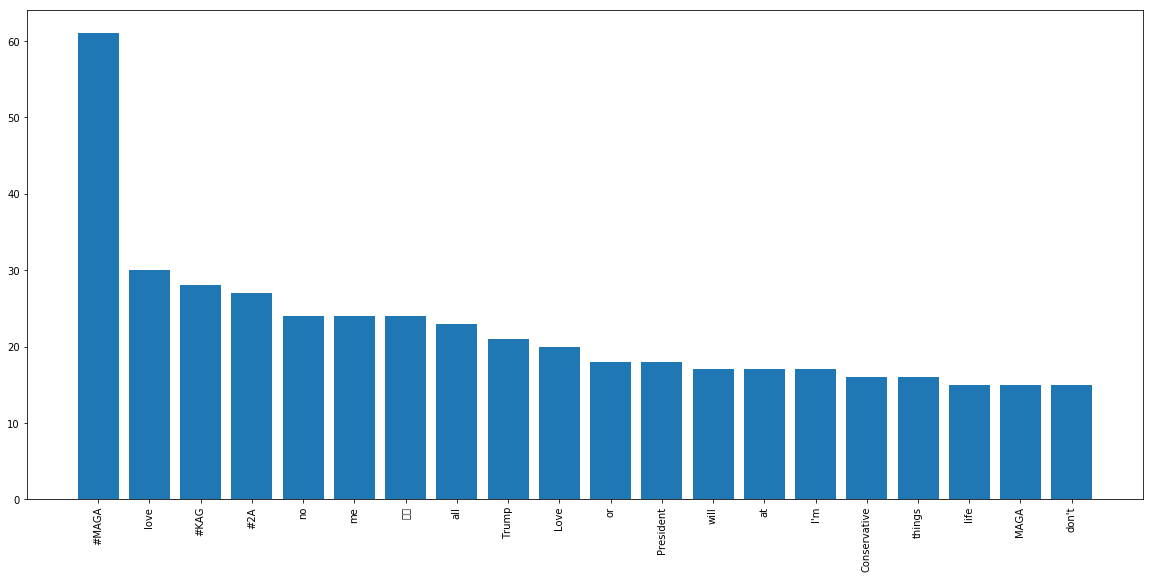

In [269]:
import matplotlib.pyplot as plt

D = top_desc

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## TWEET NUMERICAL ANALYSIS

In [254]:
MAGA_COUNT = 0
LGBT_COUNT = 0 
VAR_COUNT = 0 
linecount = 0
APPENDED_TEXT = ""


for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = status_array[x]['text']
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count('MAGA') >= 1:
        MAGA_COUNT = MAGA_COUNT + 1

    if str(text).count('LGBT') >= 1:
        LGBT_COUNT = LGBT_COUNT + 1

    if str(text).count('femi') >= 1:
        VAR_COUNT = VAR_COUNT + 1
        
print(MAGA_COUNT)
print(LGBT_COUNT)
print(VAR_COUNT)
print(linecount)


16
7
49
1000


In [255]:
len(APPENDED_TEXT)

125176

In [256]:
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x["and"], x["the"], x["of"],x["to"], x["a"], x["I"], x["&"], x["in"], x["for"], x["my"], x["is"], x["the"], x["are"], x["you"], x["on"]
del x["with"], x["not"], x["but"], x["be"], x["The"], x["No"], x["who"], x["|"], x["about"], x["that"], x["your"], x["•"], x['from'], x['-'], x['it'], x['am'], x[','], x['like'],x['just']
del x['It'], x['A'],x['our'],x['this'],x['have'],x['by'],x['an'],x['going'],x['they'],x['having']

top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)


OrderedDict([('sex', 367), ('women', 312), ('#SexStrike', 286), ('men', 116), ('liberal', 91), ('has', 84), ('#sexstrike', 81), ('we', 77), ('support', 76), ('Mother’s', 67), ('great', 67), ('their', 65), ('On', 64), ('strike.', 61), ('feel', 60), ('movement', 59), ('Day,', 58), ('@AbbyJohnson:', 57), ('FULL', 57), ('pro-abortion', 57)])


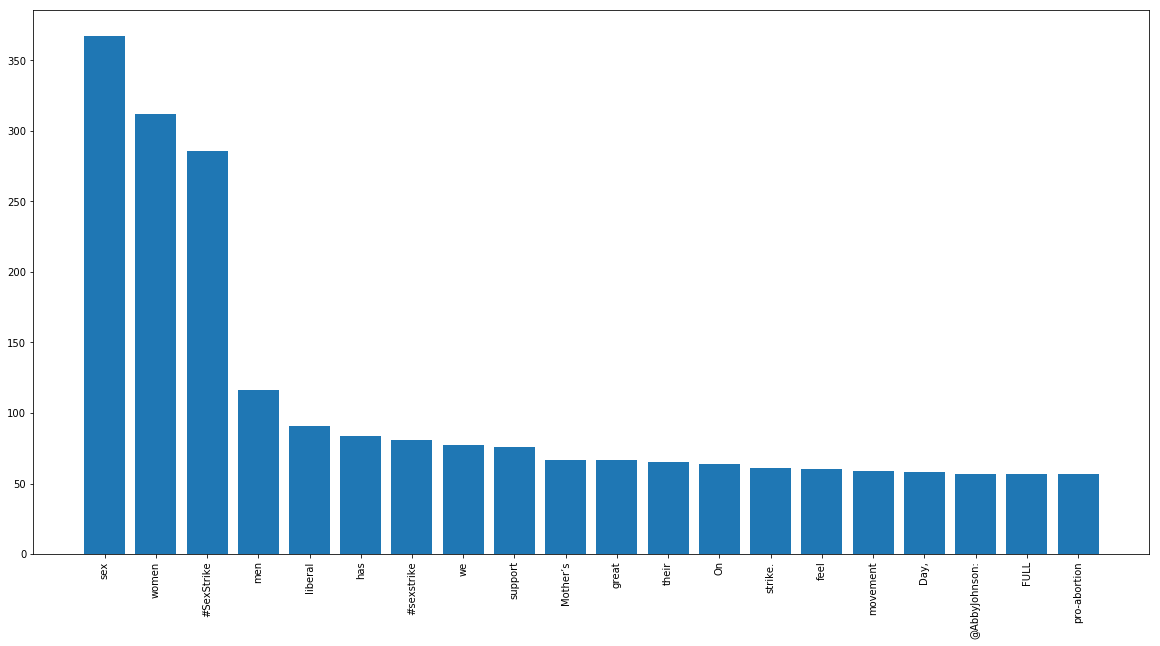

In [270]:
import matplotlib.pyplot as plt

D = top_tweets

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()
